# Example: PyRayHF Snell's Law Raytracing

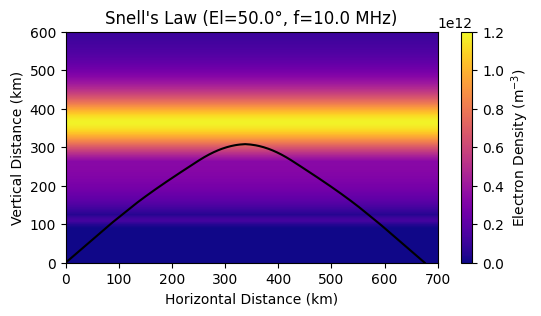

--------------------------------------------------
Snell's Law Raytracing:
--------------------------------------------------
Group Path (km):  929.1301673496166
Group delay (sec):  0.0035100005520780583
Ground Range (km):  675.620220419237
x midpoint (km):  328.1517796293652
z midpoint (km):  307.0


In [9]:
#!/usr/bin/env python
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PyRayHF.library import trace_ray_cartesian_stratified

# Load an ionospheric profile
# See Example_Generate_Input_Arrays for how to create input
# arrays using PyIRI.
file_open = 'Example_input.p'
input_arrays = pickle.load(open(file_open, 'rb'))

alt_km = input_arrays["alt"]
Ne = input_arrays["den"]
Babs = input_arrays["bmag"]
bpsi = input_arrays["bpsi"]

# Ensure ground level is included
h_ground = 0
if alt_km[0] > h_ground:
    Ne0 = np.interp(h_ground, alt_km, Ne)
    Babs0 = np.interp(h_ground, alt_km, Babs)
    bpsi0 = np.interp(h_ground, alt_km, bpsi)
    alt_km = np.insert(alt_km, 0, h_ground)
    Ne = np.insert(Ne, 0, Ne0)
    Babs = np.insert(Babs, 0, Babs0)
    bpsi = np.insert(bpsi, 0, bpsi0)

# Define inputs
elevation_deg = 50.
f0_Hz = 10e6

# Trace Using Snell's Law Cartesian 2-D Raytracing
result = trace_ray_cartesian_stratified(f0_Hz=f0_Hz,
                                        elevation_deg=elevation_deg,
                                        alt_km=alt_km,
                                        Ne=Ne,
                                        Babs=Babs,
                                        bpsi=bpsi,
                                        mode="O"
)

# Plot the results.
# Create 2D density grid (Ne assumed horizontally uniform)
nx = 500
xmax = np.max(result['x']) * 1.1
x_grid = np.linspace(0, xmax, nx)
z_grid = alt_km
Xg, Zg = np.meshgrid(x_grid, z_grid)
Ne_grid = np.tile(Ne[:, np.newaxis], (1, nx))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 3)
ax_plot = ax
ax_plot.set_xlim(0, 700)
ax_plot.set_ylim(0, 600)
ax_plot.set_facecolor("lightgray")
ax_plot.set_ylabel('Vertical Distance (km)')
ax_plot.set_xlabel('Horizontal Distance (km)')
vmin = 0
vmax = 1.2e12
color_ticks = np.arange(vmin, vmax + 2e11, 2e11)
pc = ax_plot.pcolormesh(Xg, Zg, Ne_grid, shading='auto',
                        cmap='plasma', vmin=vmin, vmax=vmax)
ax_plot.plot(result['x'], result['z'], c='black')
ax_plot.set_title(f"Snell\'s Law (El={elevation_deg:.1f}°, f={f0_Hz/1e6} MHz)")
plt.colorbar(pc, label='Electron Density (m$^{-3}$)', ax=ax_plot,
             ticks=color_ticks)
plt.savefig('/Users/vmakarevich/Documents/GitHub/PyRayHF/docs/examples/figures/Snells_Law.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print('--------------------------------------------------')
print('Snell\'s Law Raytracing:')
print('--------------------------------------------------')
print('Group Path (km): ', result['group_path_km'])
print('Group delay (sec): ', result['group_delay_sec'])
print('Ground Range (km): ', result['ground_range_km'])
print('x midpoint (km): ', result['x_midpoint'])
print('z midpoint (km): ', result['z_midpoint'])